# Racial Profiling and marijuana Reform Case Study


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import detect_simpsons_paradox as dsp

In [2]:
hit_search_rate = pd.read_csv('../data/state_hit_rate_min_cols_COCTFLILMDMAMOMTNENCOHRISCTXVTWAWI.csv',index_col='Unnamed: 0')
hit_search_rate.head()

,state,year,driver_gender,driver_race,decriminalization,medical,recreational,no_reforms,search_conducted_false,search_conducted_true,search_conducted_rate,contraband_found_false,contraband_found_true,contraband_found_rate,hit_false,hit_true,hit_rate,num_stops
0,AZ,2009,F,White,0,0,0,1,30.0,1.0,0.032258,31.0,NaN,NaN,1.0,NaN,NaN,31.0
1,AZ,2009,M,Black,0,0,0,1,1.0,2.0,0.666667,2.0,1.0,0.333333,1.0,1.0,0.5,3.0
2,AZ,2009,M,Hispanic,0,0,0,1,14.0,1.0,0.066667,15.0,NaN,NaN,1.0,NaN,NaN,15.0
3,AZ,2009,M,White,0,0,0,1,32.0,4.0,0.111111,34.0,2.0,0.055556,2.0,2.0,0.5,36.0
4,AZ,2010,F,Asian,0,1,0,0,58.0,3.0,0.049180,61.0,NaN,NaN,3.0,NaN,NaN,61.0


In [57]:
type(hit_search_rate) is pd.core.frame.DataFrame
meta = pd.DataFrame(index = hit_search_rate.columns, columns = ['var_type','dtype','role','isCount'])
meta['dtype']= hit_search_rate.dtypes

In [ ]:
hit_search_rate.dtype

In [63]:
'int' in str(hit_search_rate['year'].dtype )

True

In [51]:
mapp = lambda row: type(hit_search_rate[row.index])
meta.apply(mapp, axis=0)

var_type    <class 'pandas.core.frame.DataFrame'>
dtype       <class 'pandas.core.frame.DataFrame'>
role        <class 'pandas.core.frame.DataFrame'>
isCount     <class 'pandas.core.frame.DataFrame'>
dtype: object

In [59]:
meta.iloc[1]

var_type      NaN
dtype       int64
role          NaN
isCount       NaN
Name: year, dtype: object

In [37]:
meta

,var_type,dtype,role,isCount
state,NaN,object,NaN,NaN
year,2010.664172,int64,NaN,NaN
driver_gender,NaN,object,NaN,NaN
driver_race,NaN,object,NaN,NaN
decriminalization,0.460243,int64,NaN,NaN
medical,0.454630,int64,NaN,NaN
recreational,0.086997,int64,NaN,NaN
no_reforms,0.215154,int64,NaN,NaN
search_conducted_false,57395.121609,float64,NaN,NaN
search_conducted_true,1312.822264,float64,NaN,NaN


In [23]:
meta['dtype']['year']

dtype('int64')

In [24]:
meta['dtype']['year'] == 'int64'

True

In [3]:
rate_vars_time = ['contraband_found_rate','hit_rate','search_conducted_rate','num_stops','year']
useful_trends = [{'name':'pearson_corr','vars':rate_vars_time,'func':dsp.get_correlations}]
cat_vars = ['state','driver_gender','driver_race','decriminalization','medical','recreational','no_reforms']
result_df = dsp.get_subgroup_trends_1lev(hit_search_rate,useful_trends,groupby_vars =cat_vars )
result_df_temporal = result_df[result_df['feat2']=='year']
result_df_temporal

,feat1,feat2,subgroup_trend,group_feat,subgroup,trend_type,agg_trend
84,contraband_found_rate,year,-0.288140,state,AZ,pearson_corr,0.041129
85,contraband_found_rate,year,-0.306415,state,CO,pearson_corr,0.041129
86,contraband_found_rate,year,0.168028,state,CT,pearson_corr,0.041129
87,contraband_found_rate,year,0.048132,state,IL,pearson_corr,0.041129
88,contraband_found_rate,year,-0.541672,state,MA,pearson_corr,0.041129
89,contraband_found_rate,year,0.150174,state,MD,pearson_corr,0.041129
90,contraband_found_rate,year,-0.223063,state,NC,pearson_corr,0.041129
91,contraband_found_rate,year,-0.009831,state,RI,pearson_corr,0.041129
92,contraband_found_rate,year,-0.059928,state,SC,pearson_corr,0.041129
93,contraband_found_rate,year,-0.022372,state,TX,pearson_corr,0.041129


In [5]:
result_df_temporal = dsp.add_slope_cols(hit_search_rate,result_df_temporal)
result_df_temporal = dsp.add_angle_col(result_df_temporal)
result_df_temporal.sort_values(by='angle',ascending=False).head(10)

/home/smb/anaconda3/lib/python3.6/site-packages/detect_simpsons_paradox/ranking_processing.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  new_res['subgroup_slope'] = slope_list


,feat1,feat2,subgroup_trend,group_feat,subgroup,trend_type,agg_trend,subgroup_slope,all_slope,angle
77,search_conducted_rate,year,0.078012,decriminalization,1,pearson_corr,-0.03903,20.641441,-4.310706,164.165908
74,search_conducted_rate,year,0.134696,driver_race,Other,pearson_corr,-0.03903,16.940813,-4.310706,163.561309
82,search_conducted_rate,year,0.080876,no_reforms,0,pearson_corr,-0.03903,12.403245,-4.310706,162.330056
58,search_conducted_rate,year,0.118238,state,CT,pearson_corr,-0.03903,5.567954,-4.310706,156.757776
69,search_conducted_rate,year,0.030411,driver_gender,F,pearson_corr,-0.03903,5.404591,-4.310706,156.456741
68,search_conducted_rate,year,0.048573,state,WI,pearson_corr,-0.03903,4.279045,-4.310706,153.785724
64,search_conducted_rate,year,0.000441,state,SC,pearson_corr,-0.03903,0.062675,-4.310706,80.525829
57,search_conducted_rate,year,-0.414566,state,CO,pearson_corr,-0.03903,-243.731682,-4.310706,12.825420
62,search_conducted_rate,year,-0.287439,state,NC,pearson_corr,-0.03903,-203.568453,-4.310706,12.779041
60,search_conducted_rate,year,-0.603026,state,MA,pearson_corr,-0.03903,-110.008840,-4.310706,12.539681


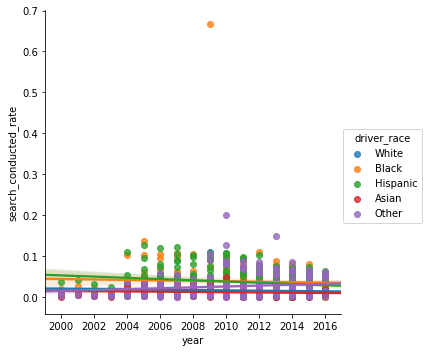

In [9]:
sns.lmplot('year','search_conducted_rate',hit_search_rate,hue='driver_race')

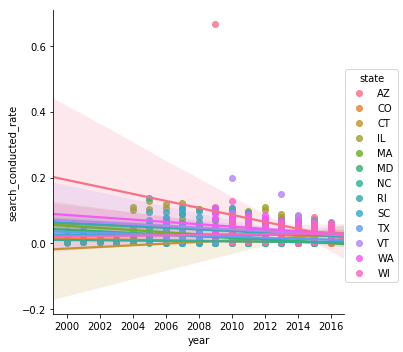

In [10]:
sns.lmplot('year','search_conducted_rate',hit_search_rate,hue='state')

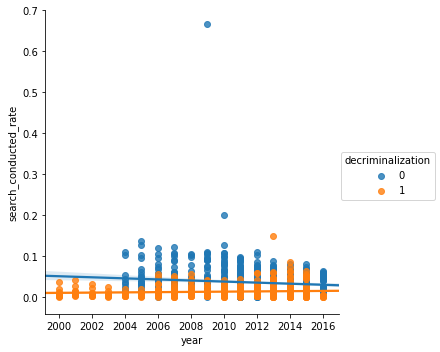

In [8]:
sns.lmplot('year','search_conducted_rate',hit_search_rate,hue='decriminalization')

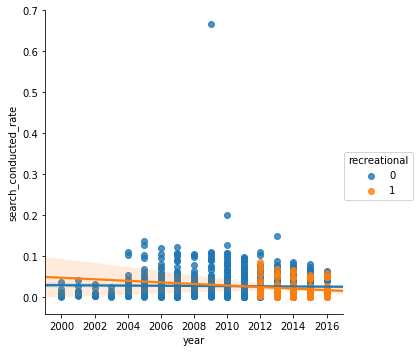

In [9]:
sns.lmplot('year','search_conducted_rate',hit_search_rate,hue='recreational')

In [51]:
sp_df2_clust = dsp.add_all_dpgmm(sp_df2,2)
sp_df2_clust = dsp.add_quantiles(sp_df2,2)

NameError: name 'sp_df2' is not defined

# Rate based testing

In [ ]:

# data_df : DataFrame
#     data to find SP in, must be tidy

# trend_types: list of strings or list of dicts
#     info on what trends to compute and the variables to use, dict is of form
# {'name':<str>,'vars':['varname1','varname1'],'func':functionhandle}


# groupby_vars : list of strings
#     column names to use as grouping variables


# trend_vars : list of strings
#     column names to use in regresison based trends


# rate_vars : list of strings
#     column names to use in rate based trends


# trend_func : function handle
#     to compute the trend




# prep the result df to add data to later
# result_df = pd.DataFrame(columns=RESULTS_DF_HEADER)

# create empty lists
all_trends = []
subgroup_trends = []

for td in trend_dict_list:
    trend_func = td['func']
    trend_vars = td['vars']
    # Tabulate aggregate statistics
    agg_trends = trend_func(data_df,trend_vars,'agg_trend')

    all_trends.append(agg_trends)

    # iterate over groupby attributes
    for groupbyAttr in groupby_vars:
        #condition the data
        cur_grouping = data_df.groupby(groupbyAttr)

        # get subgoup trends
        curgroup_corr = trend_func(cur_grouping,trend_vars,'subgroup_trend')

        # append
        subgroup_trends.append(curgroup_corr)




# condense and merge all trends with subgroup trends
all_trends = pd.concat(all_trends)
subgroup_trends = pd.concat(subgroup_trends)
result_df = pd.merge(subgroup_trends,all_trends)